# Innlevering 2 - Covid-19

## Del 1

Du har frist til torsdag 19. mars for å lage en modell for utviklingen til antall bekreftede smittede av Covid-19 i følgende land:
 - Norge
 - Danmark
 - Frankrike


Du skal ta utgansgspunkt i difflikningen $$N^{\prime}(t) = c N(t)\left(1-\frac{N(t)}{b}\right)$$

fra videoen under

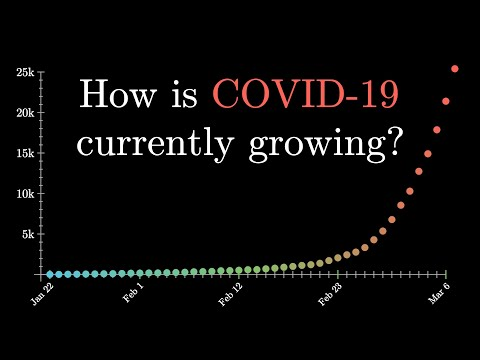

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('Kas0tIxDvrg', width=800, height=400)

der 

 - $N$ er antall bekreftet smittet. 
 - $c$ = $p \cdot E$ 
 - $E$ er antall smittede en person er i kontakt med i gjennomsnitt hver dag.
 - $p$ er sannsynligheten for at en smitter en man er i kontakt med.
 - $b$ er bæreevnen til viruset
 
 
 Fra og med 13. mars skjedde det noe med E i Norge, kan du på en fornuftig måte få med det i modellen?
 Det skjedde i Danmark 12. mars. Under er et eksempel på hvilket utslag det kan få for de to tilfellene. (Tallene under er ikke fra Norge og Danmark)
 
 <img src="https://miro.medium.com/max/5972/1*4kOJv8hmd5VFPcBL1mywsw.png">
 
Det er også en del forsinkelser fra en person er smitted til den blir testet for det. 5 dagers inkubasjonsttid pluss én uke med milde symptomer. I Wuhan tok det 12 dager etter de stengte alt til vekstraten ble under 1. Altså vendepunktet for grafen til N. Antall tilfeller i norge er betydelig lavere og det er ganske sannsynlig at det vil gå litt raskere her. 


Se 02_Populasjonsmodeller for tips til Eulers metode.


### Oppgave

 - Bestem $p$, $E$ og $b$ for Norge, Danmark og Frankrike. Begrunn valgene. 
 
 - Kjør modellene for $N=90$ (antall dager) med startdato 2. mars

 - Plot grafene til modellene sammen med dataen du har frem til torsdag. 

 - Plot også den deriverte til de ulike modellen
 
  ```python
  plt.plot(t[1:-1], (N[1:-1]-N[0:-2])/dt)
  ```
 
 
 - Husk navn på grafer og akser.
 
 - Forklar resultatene du får og sammenlign mellom de ulike landene.

## Pandas

In [1]:
import pandas as pd

**Laste inn dataene i csv-filen til en dataframe**

<a href="https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv">Datasett</a> - oppdateres hver dag.

In [42]:
df = pd.read_csv('covid_19_clean_complete.csv')
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0
5,British Columbia,Canada,49.2827,-123.1207,1/22/20,0,0,0
6,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0
7,Victoria,Australia,-37.8136,144.9631,1/22/20,0,0,0
8,Queensland,Australia,-28.0167,153.4000,1/22/20,0,0,0
9,NaN,Cambodia,11.5500,104.9167,1/22/20,0,0,0


**Fikse formate på dato og årstall**

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


**Fjerne regionene++ og legge sammen smittede**

In [44]:
df = df.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index() 
df.head()

,Date,Country/Region,Confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Angola,0


**Kan også fikse tabellen slik at vi får en tidsserie for hvert land**

In [45]:
df_p = df.pivot(index='Date', columns='Country/Region', values='Confirmed')
df_p.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0


**Plukk ut landene du ønsker å se på**

In [46]:
df_p = df_p[['Norway','Denmark','France','US', 'Sweden', 'Spain', 'Italy']]
df_p.head()

Country/Region,Norway,Denmark,France,US,Sweden,Spain,Italy
Date,,,,,,,
2020-01-22,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0
2020-01-24,0,0,2,0,0,0,0
2020-01-25,0,0,3,0,0,0,0
2020-01-26,0,0,3,0,0,0,0


**Plot**

In [47]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4.5)
plt.style.use('ggplot')

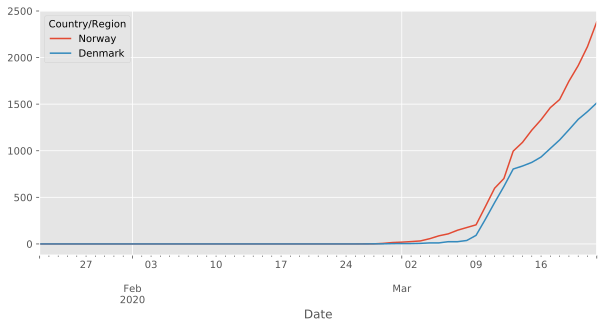

In [48]:
df_p.plot(y=['Norway', 'Denmark'])

**Plot for mars**

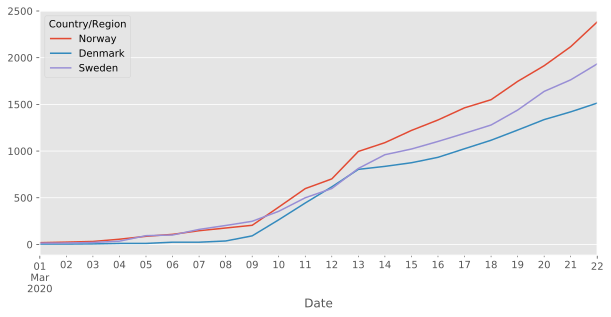

In [49]:
df_p['2020-03'].plot(y=['Norway','Denmark','Sweden'])

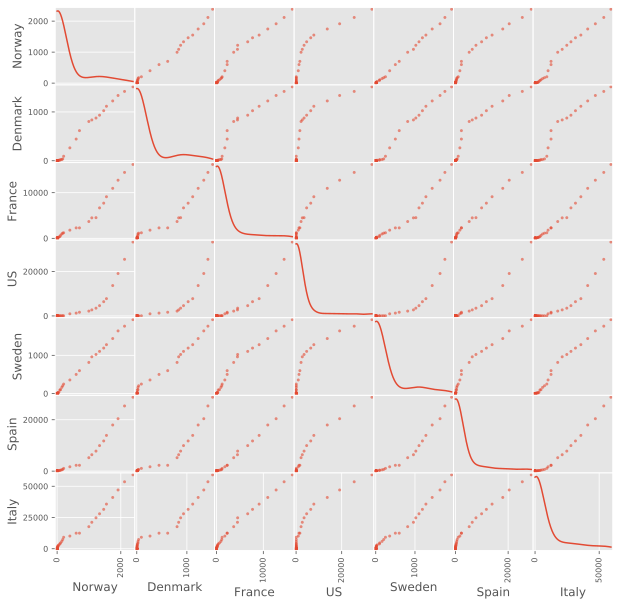

In [50]:
pd.plotting.scatter_matrix(df_p, alpha=0.6, figsize=(10, 10), diagonal='kde')
plt.show()

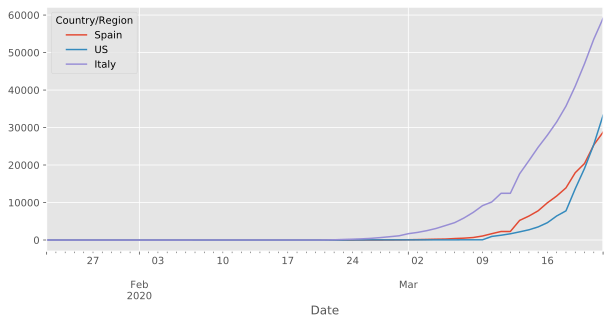

In [51]:
df_p.plot(y=['Spain','US', 'Italy'])

Rar modell

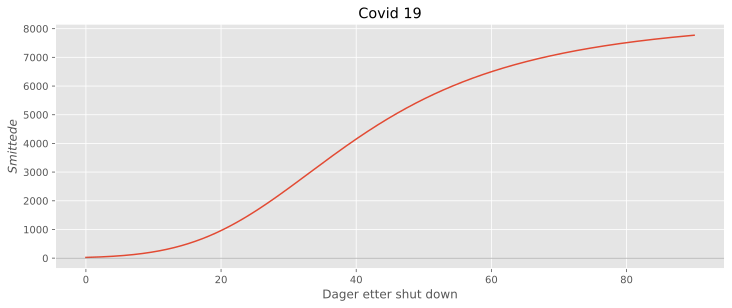

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Initialbetingelsene
K_0 = 25       
a   = 0.015    
b   = 10000    

def p(t):
    return 0.2586603883678 * np.e**(-0.03405504158448 * t)

#Tidssteg
T = 90         #Antall dager
dt = 0.01      #Steglengde
N = round(T/dt)#Antall steg


t = np.linspace(0, T, N)
K = np.zeros(N)

K[0] = K_0

#Eulers metode
for i in range(N - 1):
    K[i + 1] = K[i] + p(i*dt)*K[i]*(1 - K[i]/b)*dt
    
plt.rcParams['figure.figsize'] = (12, 4.5)
plt.xlabel('Dager etter shut down') # Merker x-aksen
plt.ylabel('$Smittede$') # Merker y-aksen
plt.title('Covid 19') #Tittel
plt.plot(t, K)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

In [88]:
tider = pd.date_range('2020-03-01', '2020-04-30', periods=N)
tider = pd.to_datetime(tider)

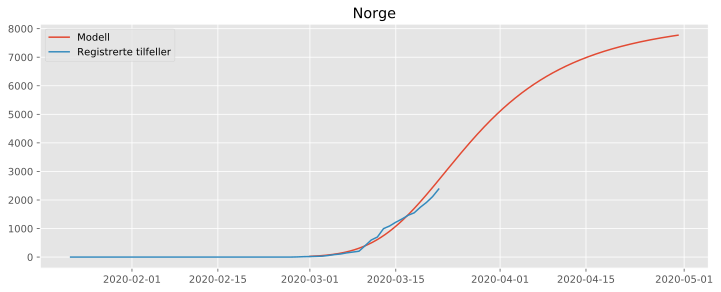

In [94]:
plt.plot(tider, K, label='Modell') 
plt.plot(df_p['Norway'], label='Registrerte tilfeller')
plt.title('Norge')
plt.legend()
plt.show()